<a href="https://colab.research.google.com/github/tamnhu2913/BCG-GenAI/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True, context="notebook", style='whitegrid', palette="tab20")
cmap = sns.color_palette('tab20')

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [ ]:
data = pd.read_excel('/content/data_report.xlsx')
data

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,Microsoft,2023,211915,72361,411976,205753,87582
1,Microsoft,2022,198270,72738,364840,198298,89035
2,Microsoft,2021,168088,61271,333779,191791,76740
3,Tesla,2023,96773,14997,106618,43009,13256
4,Tesla,2022,81462,12556,82338,36440,14724
5,Tesla,2021,53823,5519,62131,30548,11497
6,Apple,2023,383285,96995,352583,290437,110543
7,Apple,2022,394328,99803,352755,302083,122151
8,Apple,2021,365817,94680,351002,287912,104038


# Calculate year-over-year changes for each financial metric

In [ ]:
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue'].pct_change() * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income'].pct_change() * 100
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets'].pct_change() * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities'].pct_change() * 100
data['Cash Flow Growth(%)'] = data.groupby('Company')['Cash Flow'].pct_change() * 100

In [ ]:
data.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth(%)
0,Microsoft,2023,211915,72361,411976,205753,87582,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,89035,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,Microsoft,2021,168088,61271,333779,191791,76740,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,Tesla,2023,96773,14997,106618,43009,13256,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462,12556,82338,36440,14724,-15.821562,-16.276589,-22.772890,-15.273547,11.074231


In [ ]:
data.fillna(0, inplace=True)
data.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth(%)
0,Microsoft,2023,211915,72361,411976,205753,87582,0.000000,0.000000,0.000000,0.000000,0.000000
1,Microsoft,2022,198270,72738,364840,198298,89035,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,Microsoft,2021,168088,61271,333779,191791,76740,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,Tesla,2023,96773,14997,106618,43009,13256,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tesla,2022,81462,12556,82338,36440,14724,-15.821562,-16.276589,-22.772890,-15.273547,11.074231


In [ ]:
data.to_excel('/content/data_report_growth.xlsx', index=False)

# Data Analysis and Visualization

In [ ]:
def plot_bar(data, title, xlabel, ylabel, width_col = 0.8, rot_= 0, size = 13, size_x = 10, yinvert = False):
  ax = data.plot(kind='bar', figsize = (10,5), width = width_col)

  if yinvert:
    plt.gca().invert_yaxis()

  plt.xticks(rotation=rot_, fontsize = size)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return ax

## Sum of Total Revenue, Net Income,	Total Assets,	Total Liabilities,Cash Flow from Operating Activities by Company

In [ ]:
company_summary = data.groupby('Company').agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Total Assets': 'sum',
    'Total Liabilities': 'sum',
    'Cash Flow': 'sum'
})
company_summary.head()

,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
Company,,,,,
Apple,1143430,291478,1056340,880432,336732
Microsoft,578273,206370,1110595,595842,253357
Tesla,232058,33072,251087,109997,39477


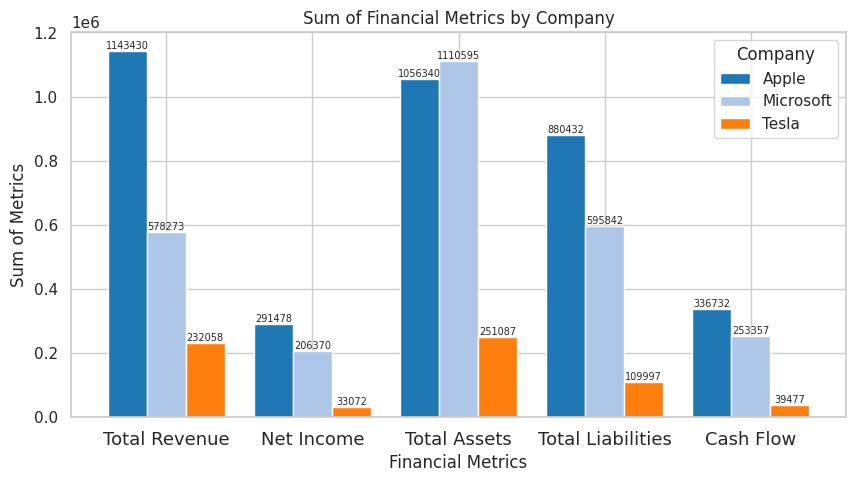

In [ ]:
ax = plot_bar(company_summary.T, 'Sum of Financial Metrics by Company','Financial Metrics','Sum of Metrics')
for p in ax.patches:
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(f'{y:.0f}', (x, y), ha='center', va='bottom', fontsize = 7)
plt.show()

* Apple has the highest revenue, good net income, and cash flow, but also has high liabilities.
* Microsoft has the highest total assets and stable net income, demonstrating the company's financial strength.
* Tesla has the lowest in all metrics. This indicates that Tesla is growing compared to Microsoft and Apple.

## Mean of the Growth of Total Revenue, Net Income, Total Assets, Total Liabilities,Cash Flow from Operating Activities by Company

In [ ]:
company_growth_mean = data.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)': 'mean',
    'Liabilities Growth (%)': 'mean',
    'Cash Flow Growth(%)': 'mean'
})
company_growth_mean.head()

,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth(%)
Company,,,,,
Apple,-1.449710,-0.746039,-0.149388,-0.227092,-1.442492
Microsoft,-7.220526,-5.081267,-6.651679,-2.301567,-4.050053
Tesla,-16.583422,-24.107169,-15.771471,-10.480864,-3.614123


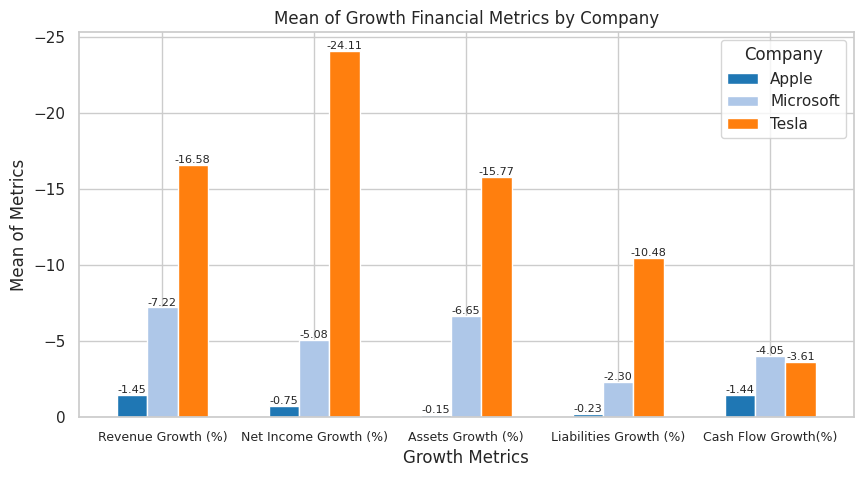

In [ ]:
ax = plot_bar(company_growth_mean.T, 'Mean of Growth Financial Metrics by Company',
         'Growth Metrics','Mean of Metrics', size = 9, width_col = 0.6, yinvert=True)
for p in ax.patches:
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(f'{y:.2f}', (x, y), ha='center', va='bottom', fontsize = 8)
plt.show()

* Apple has the most stable revenue and profit
* Microsoft maintains good assets
* Tesla experiences higher declines in most metrics due to being in a phase of rapid expansion and significant investment.

## Correlation of Growth Metrics

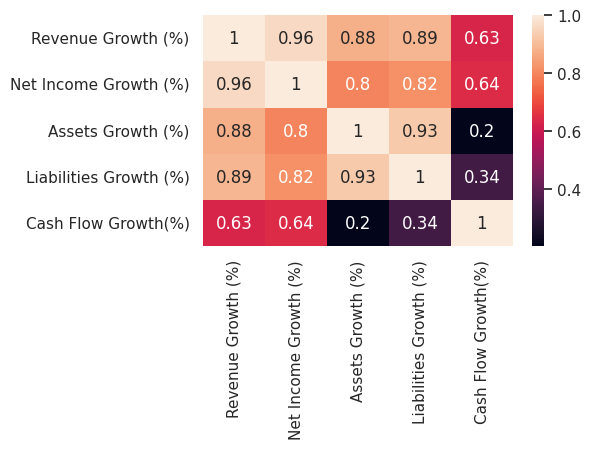

In [ ]:
correlation = data[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth(%)']].corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation, annot =True)
plt.show()